In [1]:
#!./env/bin/ python3

# Import modules
import datetime as dt
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.dates import MonthLocator

import modules.investingHelpers as investment

# Helpful
# https://www.youtube.com/watch?v=t_vZDyQDUkk

In [30]:
close_prices = pdr.get_data_yahoo('MSFT', dt.datetime(2021,7,9), dt.datetime.now(), progress=False).iloc[:, 3]
#close_prices.head()
print(close_prices)

Date
2021-07-09    277.940002
2021-07-12    277.320007
2021-07-13    280.980011
2021-07-14    282.510010
2021-07-15    281.029999
                 ...    
2023-02-13    271.320007
2023-02-14    272.170013
2023-02-15    269.320007
2023-02-16    262.149994
2023-02-17    258.059998
Name: Close, Length: 407, dtype: float64


In [3]:
a = {}
a['one'] = [1,2,3]
a['two'] = [5,6,7]
print(a)

{'one': [1, 2, 3], 'two': [5, 6, 7]}


In [7]:
dat = pdr.get_data_yahoo('MSFT', dt.datetime(2021,7,9), dt.datetime.now() - dt.timedelta(days=2), progress=False).iloc[:, 4]
print(dat.shape)
print(dat[0])
print(dat[dt.datetime(2021,7,19)])

if dt.datetime(2021,7,1) in dat.keys():
    print('yes')
else:
    print('no')

(407,)
273.64642333984375
272.7307434082031
no


In [2]:
#end_date = dt.datetime.now()  - dt.timedelta(days=1)
end_date = dt.datetime(2022,8,6) # Year, month, day
start_date = dt.datetime(2021,7,9) # Year, month, day

myPortfolio = investment.Portfolio()
myPortfolio.AddTransactions('./data/History-Aug6-2022.tsv') #./data/Test_History.tsv ./data/History-Aug6-2022.tsv
myPortfolio.TrackValue(start_date, end_date)

In [3]:
#print(myPortfolio.value_history)
#print(myPortfolio.stock_list)
#print(myPortfolio.cash)
print(len(myPortfolio.value_history))
print(len(myPortfolio.dates))
print(len(myPortfolio.deposit_history))

281
281
281


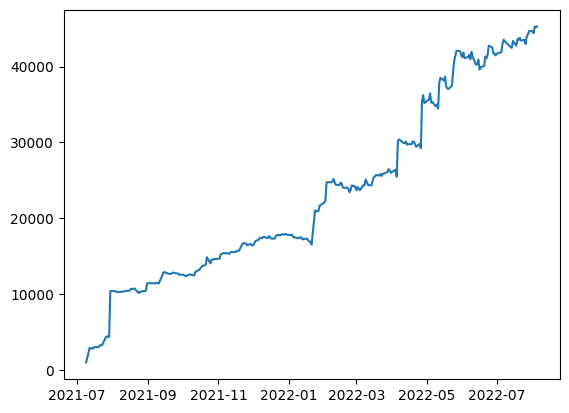

In [3]:
plt.plot(myPortfolio.dates, myPortfolio.value_history, '-')
plt.show()

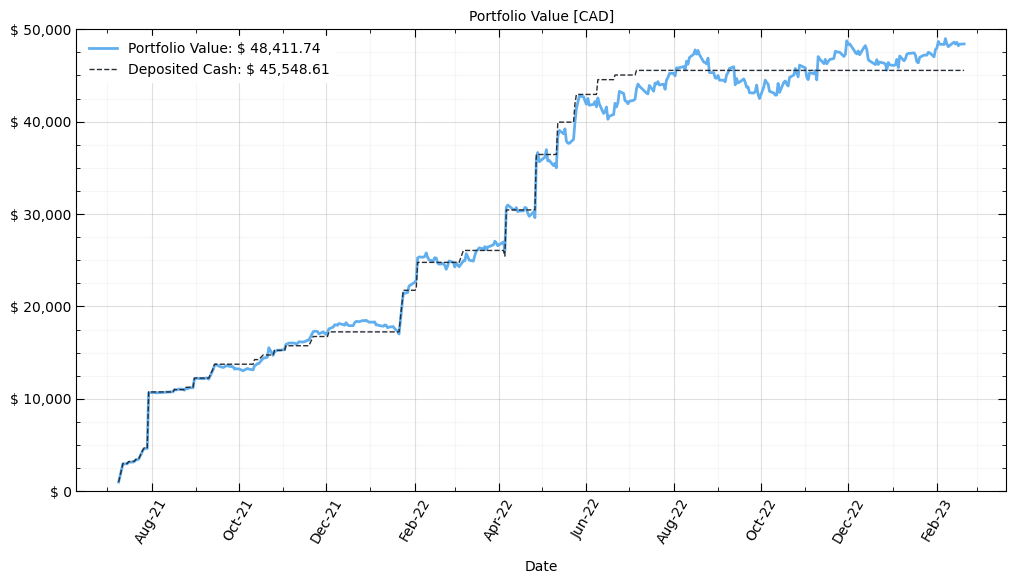

In [3]:
plot_colours = {'black':  '#282c34',
                'green':  '#98c379',
                'red':    '#e06c75',
                'yellow': '#e5c07b',
                'blue':   '#61afef',
                'purple': '#c678dd',
                'cyan':   '#56b6c2'}

# -----------------------------------------------------------------------------------
# Plot portfolio value over time

# Plotting parameters
y_min = 0
y_max = 50000
#y_ticks = np.linspace(y_min, y_max, int(((y_max-y_min)/10)+1))

fig, ax = plt.subplots(figsize=(12, 6))

# Plot
ax.plot(myPortfolio.dates, myPortfolio.value_history, '-', color=plot_colours['blue'], linewidth=2,
        label='Portfolio Value: $ {:,.2f}'.format(myPortfolio.value_history[-1]))

cumulative_deposits = np.cumsum(myPortfolio.deposit_history)
ax.plot(myPortfolio.dates, cumulative_deposits, '--', color=plot_colours['black'], linewidth=1,
        label='Deposited Cash: $ {:,.2f}'.format(cumulative_deposits[-1]))

# Format plot
plt.title('Portfolio Value [CAD]', fontsize=10)
plt.xlabel('Date',fontsize=10, labelpad=10)
#plt.ylabel('Portfolio Value [CAD]', fontsize=10, labelpad=10)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
#ax.yaxis.set_major_formatter('$ {x:1.0f} K')
ax.yaxis.set_major_formatter('$ {x:1,.0f}')

plt.xticks(rotation = 60)
#plt.yticks(y_ticks)

# https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/

#ax.xaxis.set_minor_locator(MonthLocator(bymonthday=[10,20], interval = 1))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_minor_locator(AutoMinorLocator(4))

ax.yaxis.set_minor_locator(AutoMinorLocator(4))

ax.tick_params(bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='both', which='both', top=True, bottom=True,
               left=True, right=True, labelsize=10, length=6, direction='in')
ax.tick_params(axis='both', which='minor', top=True, bottom=True,
               left=True, right=True, length=3, direction='in')

plt.ylim([0,y_max])

plt.grid(which='major', alpha=0.4)
plt.grid(which='minor', alpha=0.1)
plt.tick_params(axis='both',labelsize=10)

legend = plt.legend(fontsize=10, loc='upper left', frameon=True, framealpha=1)
legend.get_frame().set_color('white')

plt.show()

[   0.          -17.14861212  -49.86650122  -16.08853078  -23.1912331
  -44.48524804  -90.54414811  -32.8268377   -36.31204047  -46.70662402
  -22.13395847  -56.63343291  -68.22749144  -62.29510672  -59.56897489
  -66.71280442  -70.21211808  -75.00503003 -101.5217497   -93.78561686]
281
[-17.14861212 -32.7178891   33.77797044  -7.10270232 -21.29401494
 -46.05890007  57.71731041  -3.48520277 -10.39458355  24.57266556
 -34.49947444 -11.59405854   5.93238472   2.72613183  -7.14382953
  -3.49931366  -4.79291195 -26.51671967   7.73613283  12.1098617 ]
280
[       -inf -1.90790303  0.67736796 -0.44147613 -0.91819244 -1.03537469
  0.63744937 -0.10616931 -0.28625721  0.52610665 -1.55866717 -0.2047211
  0.08695006  0.04376157 -0.11992534 -0.0524534  -0.06826332 -0.35353255
  0.07620173  0.1291228 ]
280


/tmp/ipykernel_2661/3400584994.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  daily_PL_change_decimal = np.array([change / abs(daily_PL[i]) for i, change in enumerate(daily_PL_change)])


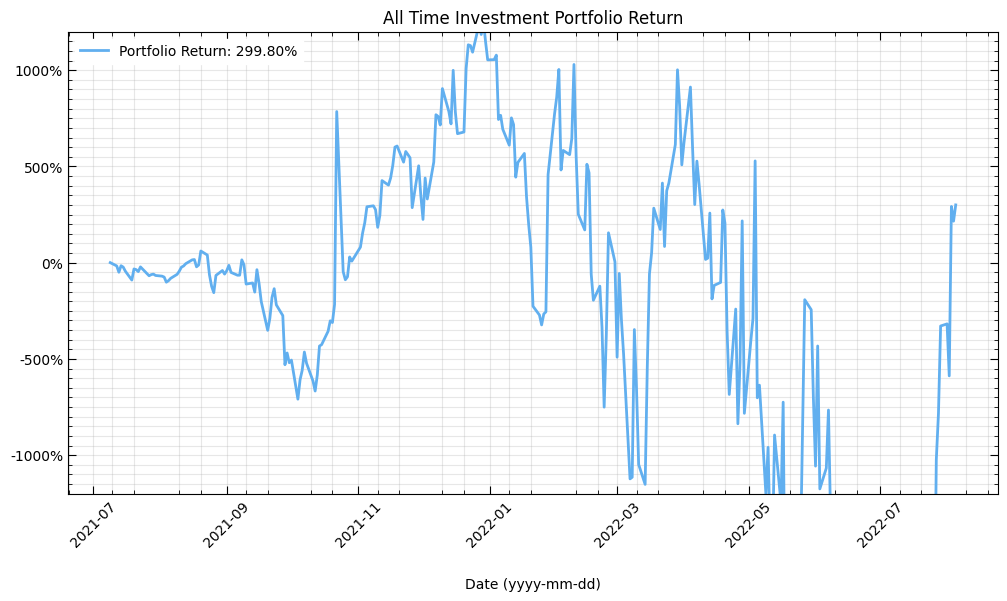

In [47]:
# -----------------------------------------------------------------------------------
# Plot portfolio time weighted return over all time

plt.close()

# Plotting parameters
y_min = -1200
y_max = 1200
#y_ticks = np.linspace(y_min, y_max, int(((y_max-y_min)/2)+1))

fig, ax = plt.subplots(figsize=(12,6))

# Get benchmark data
#benchmarkPoints = np.array(helpers.benchmarkReturn(startDate, endDate, allDays, '^GSPC'))

daily_PL = myPortfolio.value_history - cumulative_deposits
daily_PL_change = np.diff(daily_PL)
#return_decimal = np.cumprod(daily_return_decimal) - 1

print(daily_PL[:20])
print(len(daily_PL))
print(daily_PL_change[:20])
print(len(daily_PL_change))

daily_PL_change_decimal = np.array([change / abs(daily_PL[i]) for i, change in enumerate(daily_PL_change)])
print(daily_PL_change_decimal[:20])
print(len(daily_PL_change_decimal))

daily_PL_change_decimal[daily_PL_change_decimal == -np.inf] = 0
cum_percent = np.cumprod([(1 + daily_return) for daily_return in daily_PL_change_decimal])

#print(return_decimal[:20])
# Plot
ax.plot(myPortfolio.dates[0:], daily_PL, '-', color=plot_colours['blue'], linewidth=2,
        label='Portfolio Return: {:1.2f}%'.format(daily_PL[-1]))

# Format plot
plt.title('All Time Investment Portfolio Return', fontsize=12)
plt.xlabel('Date (yyyy-mm-dd)',fontsize=10, labelpad=20)
ax.yaxis.set_major_formatter('{x:1.0f}%')
plt.xticks(rotation = 45)
#plt.yticks(y_ticks)

ax.xaxis.set_minor_locator(MonthLocator(bymonthday=[10,20], interval = 1))
ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.tick_params(bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='both', which='both', top=True, bottom=True,
               left=True, right=True, labelsize=10, length=6, direction='in')
ax.tick_params(axis='both', which='minor', top=True, bottom=True,
               left=True, right=True, length=3, direction='in')

plt.ylim([y_min,y_max])

plt.grid(which='both', alpha=0.3)
plt.tick_params(axis='both',labelsize=10)

legend = plt.legend(fontsize=10, loc='upper left', frameon=True, framealpha=1)
legend.get_frame().set_color('white')

plt.show()

In [14]:
class Joe():
    def __init__(self):
        self.num = 5
    
    def someFunc(self, otherNum):
        print(self.num + otherNum)
        return self.num + otherNum
    
    def outsideFunc(self, funcToCall):
        thefunction = getattr(self, funcToCall)
        thefunction(2)

In [15]:
guy = Joe()
guy.outsideFunc('someFunc')

7


In [5]:
myList = []

myList.append(investment.Stock('AAPL'))
myList.append(investment.Stock('MSFT'))
myList.append(investment.Stock('GOOGL'))

print(myList)
print([str(name) for name in myList])

# Get the stock we want to remove
stock = next((stock for stock in myList if stock.ticker == 'MSFT'), None)
if stock == None:
    raise Exception('Error: A stock with the ticker {} was not found in the stock list of this portfolio'.format('MSFT'))

myList.remove(stock)

print(myList)
print([str(name) for name in myList])

[<modules.investingHelpers.Stock object at 0x7f8895000130>, <modules.investingHelpers.Stock object at 0x7f8856e34c20>, <modules.investingHelpers.Stock object at 0x7f8856e78e00>]
['AAPL', 'MSFT', 'GOOGL']
[<modules.investingHelpers.Stock object at 0x7f8895000130>, <modules.investingHelpers.Stock object at 0x7f8856e78e00>]
['AAPL', 'GOOGL']


In [2]:
ts = investment.TransactionReader('./data/Test_History.tsv')

print(ts.tickers)

['Cash' 'ZWC.TO' 'VDY.TO' 'Cash' 'Cash' 'Cash' 'Cash' 'Cash' 'AAPL' 'REVS'
 'Cash' 'Cash' 'LMT' 'Cash' 'POW.TO' 'TCEHY' 'Cash' 'NCLH' 'NCLH' 'Cash'
 'ENB.TO' 'T.TO' 'CU.TO' 'Cash' 'Cash' 'Cash' 'Cash' 'MFC.TO' 'Cash'
 'Cash' 'Cash' 'MFC.TO' 'CU.TO' 'T.TO' 'BCE.TO' 'POW.TO' 'MFC.TO' 'ENB.TO'
 'CU.TO' 'TRP.TO' 'TD.TO' 'CNR.TO' 'MFC.TO' 'TRP.TO' 'Cash' 'Cash' 'REVS'
 'TCEHY' 'BTI' 'AQN.TO' 'ZWC.TO' 'BTI' 'CU.TO' 'AQN.TO' 'CU.TO' 'BTI'
 'BTI' 'CU.TO' 'CLX' 'CLX' 'Cash' 'AQN.TO' 'BCE.TO' 'SU.TO' 'VDY.TO'
 'SU.TO' 'BCE.TO' 'BCE.TO' 'BCE.TO' 'CU.TO' 'CU.TO' 'CU.TO' 'AAPL'
 'TRP.TO' 'BTI']


In [10]:
transactions = np.genfromtxt('./data/Test_History.tsv', delimiter='\t', skip_header=2, autostrip=True, dtype=str)

print(transactions.shape)

print(transactions[:,0][:2])
#d = '07/12/2021'
d = transactions[:,0][:2]
#actual_date = dt.datetime(d)
actual_date = np.array([dt.datetime.strptime(t, '%m/%d/%Y').date() for t in d])

#actual_date = dt.datetime.strptime(d, '%m/%d/%Y')
print(actual_date)
print(type(actual_date))

print(actual_date[0])

# %m %d %y

(75, 10)
['07/09/2021' '07/12/2021']
[datetime.date(2021, 7, 9) datetime.date(2021, 7, 12)]
<class 'numpy.ndarray'>
2021-07-09


In [33]:
date_dict = dict.fromkeys(actual_date, [])

print(date_dict)

print(len(date_dict[actual_date[0]]))

{datetime.datetime(2021, 7, 9, 0, 0): [], datetime.datetime(2021, 7, 12, 0, 0): []}
0


In [3]:
end_date = dt.datetime.now()
start_date = dt.datetime(2023,2,2) # Year, month, day

investment.GetWeekdays(start_date, end_date)

array([datetime.datetime(2023, 2, 2, 0, 0),
       datetime.datetime(2023, 2, 3, 0, 0),
       datetime.datetime(2023, 2, 6, 0, 0),
       datetime.datetime(2023, 2, 7, 0, 0),
       datetime.datetime(2023, 2, 8, 0, 0),
       datetime.datetime(2023, 2, 9, 0, 0),
       datetime.datetime(2023, 2, 10, 0, 0),
       datetime.datetime(2023, 2, 13, 0, 0),
       datetime.datetime(2023, 2, 14, 0, 0),
       datetime.datetime(2023, 2, 15, 0, 0),
       datetime.datetime(2023, 2, 16, 0, 0),
       datetime.datetime(2023, 2, 17, 0, 0),
       datetime.datetime(2023, 2, 20, 0, 0),
       datetime.datetime(2023, 2, 21, 0, 0)], dtype=object)

In [12]:
# Choose a date range and pull data
end_date = dt.datetime.now()
start_date = dt.datetime(2020,1,1) # Year, month, day

stock_list = ['VFV.TO']

yf.pdr_override()
df = pdr.get_data_yahoo(stock_list, start_date, end_date, progress=False)
print(type(df.iloc[:, [4]]))
#close = df.Close
#print(type(close))

#df.head()
#print(df.shape)
#df.head()

<class 'pandas.core.frame.DataFrame'>


In [2]:
end_date = dt.datetime.now()
start_date = dt.datetime(2020,1,1) # Year, month, day

myStock = Stock('Apple', 'AAPL')

myStock.PullData(start_date, end_date)

myStock.Buy(5)

print(myStock.units)
#myStock.close_prices
print(myStock)

5
Apple (AAPL)


In [4]:
# Try to access exchagne rate data

end_date = dt.datetime.now()
start_date = dt.datetime(2020,1,1)

myExchange = investment.Stock('USDCAD=X')

print(myExchange)

myExchange.PullData(start_date, end_date)

print(myExchange.close_prices)
print(type(myExchange.close_prices))
print(type(myExchange.close_prices[0]))
print(myExchange.close_prices[0])
print(myExchange.close_prices.keys)
print(myExchange.close_prices[dt.datetime(2023,2,16)])
#print(myExchange.close_prices[dt.datetime(2023,2,16)])
#print(myExchange.close_prices[str(dt.datetime(2023,2,16))])
print(myExchange.close_prices.keys()[0])

USDCAD=X
Date
2020-01-01    1.30020
2020-01-02    1.29730
2020-01-03    1.29830
2020-01-06    1.29866
2020-01-07    1.29639
               ...   
2023-02-14    1.33331
2023-02-15    1.33406
2023-02-16    1.33906
2023-02-17    1.34730
2023-02-20    1.34820
Name: Adj Close, Length: 819, dtype: float64
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
1.3001999855041504
<bound method Series.keys of Date
2020-01-01    1.30020
2020-01-02    1.29730
2020-01-03    1.29830
2020-01-06    1.29866
2020-01-07    1.29639
               ...   
2023-02-14    1.33331
2023-02-15    1.33406
2023-02-16    1.33906
2023-02-17    1.34730
2023-02-20    1.34820
Name: Adj Close, Length: 819, dtype: float64>
1.3390599489212036
2020-01-01 00:00:00


In [19]:
msft = yf.Ticker('VFV.TO')
name = msft.info['longName']
print(name)

Vanguard S&P 500 Index ETF


In [4]:
# Choose a date range and pull data
end_date = dt.datetime.now()
start_date = dt.datetime(2020,1,1) # Year, month, day

myPortfolio = Portfolio()

myPortfolio.AddStock('MSFT')
myPortfolio.AddStock('AAPL')
myPortfolio.AddStock('VFV.TO')

for stock in myPortfolio.stock_list:
    stock.PullData(start_date, end_date)

print([str(stock) for stock in myPortfolio.stock_list])

#stock = next((stock for stock in myPortfolio.stock_list if stock.ticker == 'Joe'), None)
print(stock)

['MSFT', 'AAPL', 'VFV.TO']
None


In [14]:
a = []
#a.append(np.array(['key1', 5]))
#a.append(np.array(['key2', 1]))

a.append(['key1', 5])
a.append(['key2', 1])

a = np.array(a)
print(a[0])
#print(a.shape())
print(a[:,0])

['key1' '5']
['key1' 'key2']


In [9]:
b = {'CAD': 1, 'USD': 2}

print(b.keys())

dict_keys(['CAD', 'USD'])


In [12]:
a = 0.1223
a -= 1
print(a)

-0.8777
